## Loading Dataset

In [28]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Data Analysis

In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Distribution of target variable
df['target'].value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

## Data Preprocessing

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names)
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric)
df.fillna(df.median(), inplace=True)

#### Scaling features

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['target']))
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:-1])

#### Encoding Categorical Variables

In [9]:
# Encode categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
encoded_df = pd.get_dummies(df, columns=categorical_columns)


## Applying Clustering Algorithms

#### K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


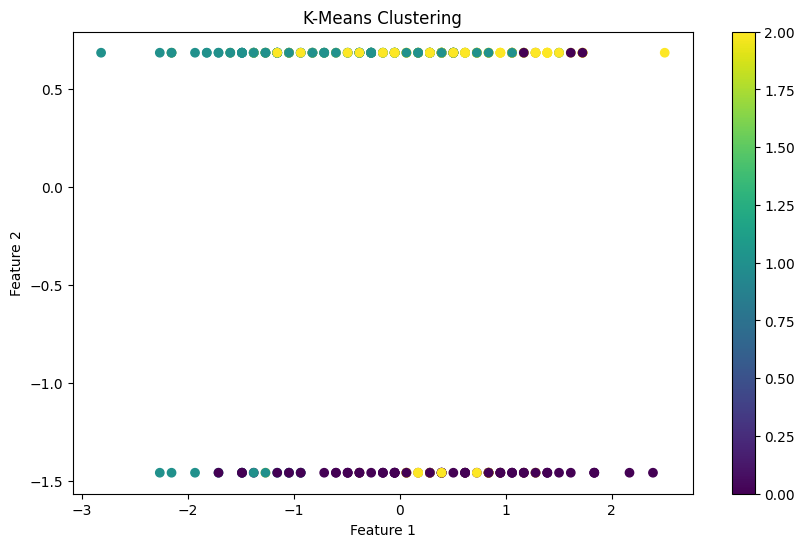

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

df['kmeans_cluster'] = kmeans_labels

# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()



#### Hierarchical Clustering

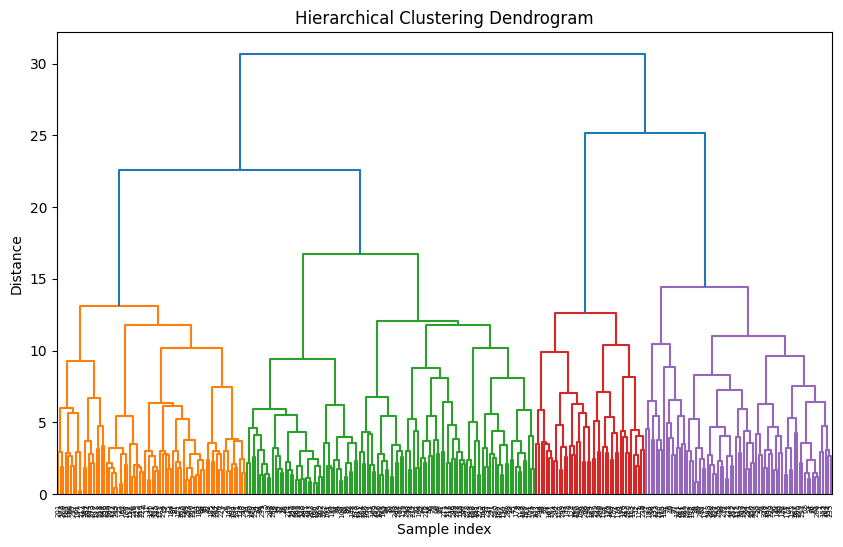

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')
df['hierarchical_cluster'] = hierarchical_labels


#### DBSCAN Clustering

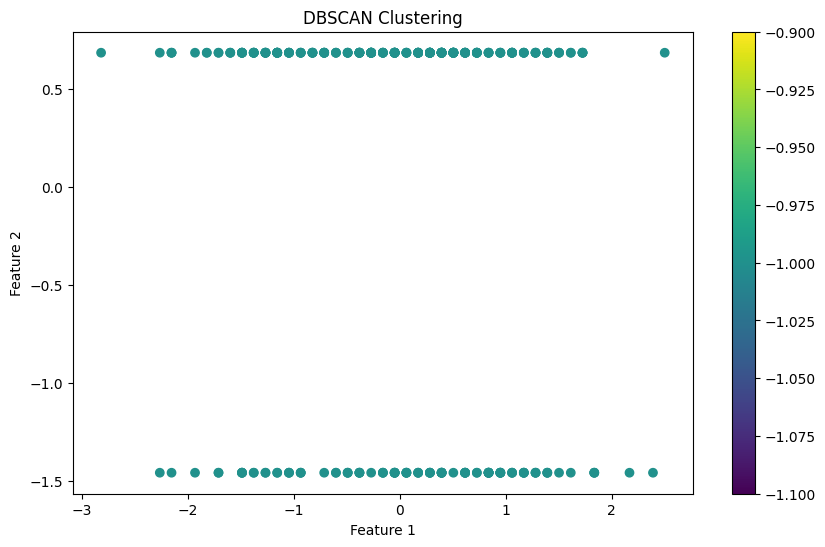

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

df['dbscan_cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


#### Gaussian Markov Models (GMM)

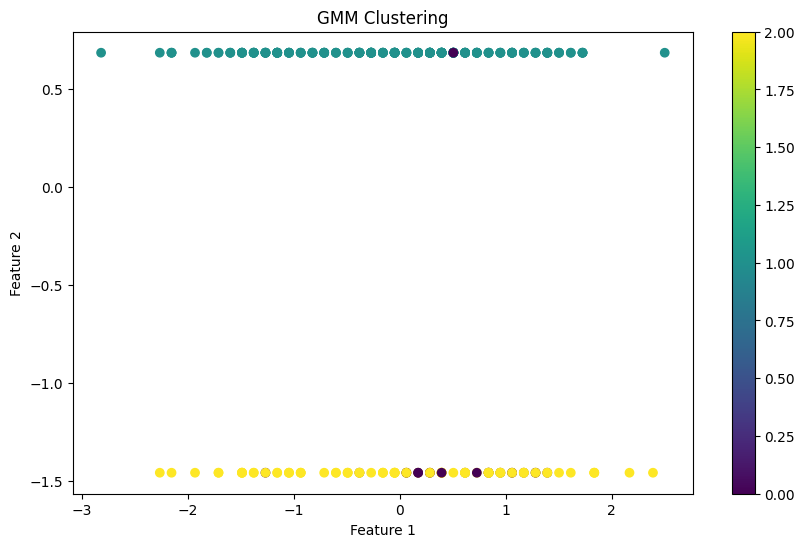

In [53]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

df['gmm_cluster'] = gmm_labels

# Visualize GMM clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


## Visualizing Clusters

#### Using PCA and t-SNE to visualize K-Means Clustering

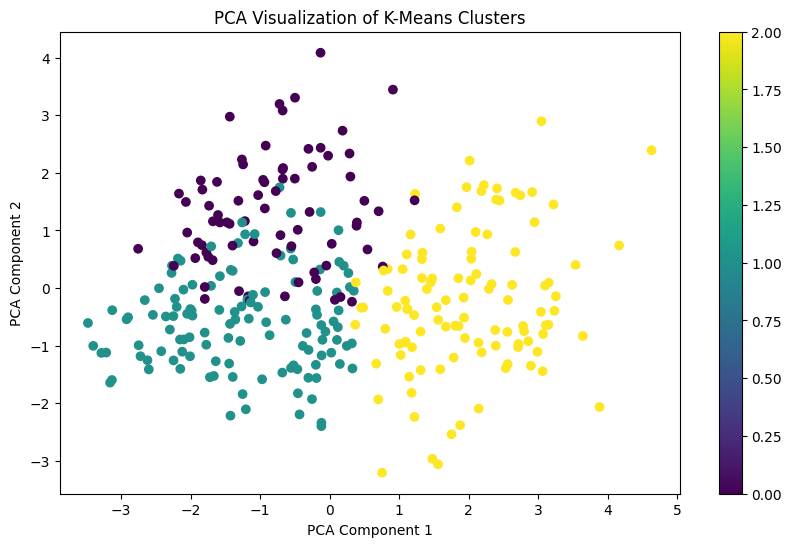

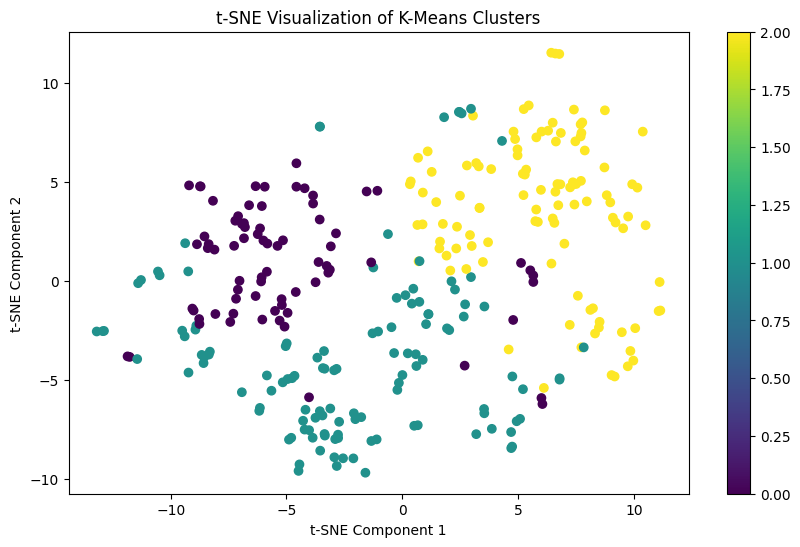

In [42]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('PCA Visualization of K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


#t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_components = tsne.fit_transform(scaled_df)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


#### Using PCA and t-SNE to visualize Hierarchical Clustering

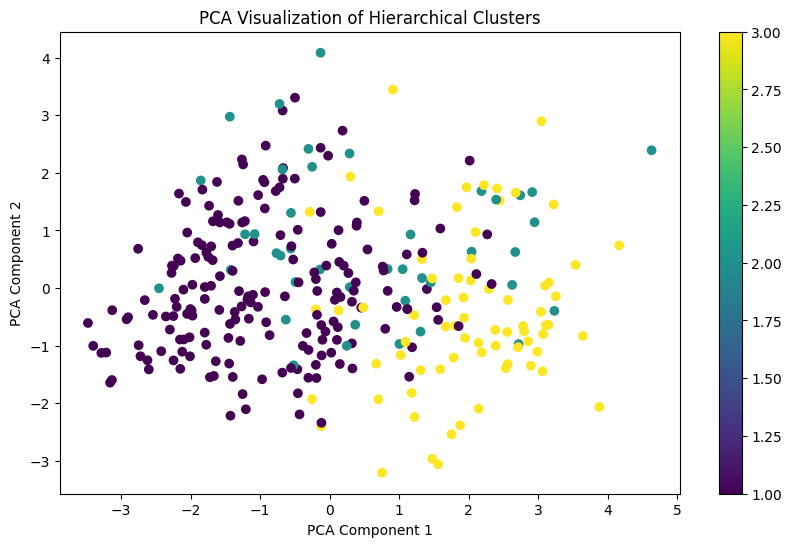

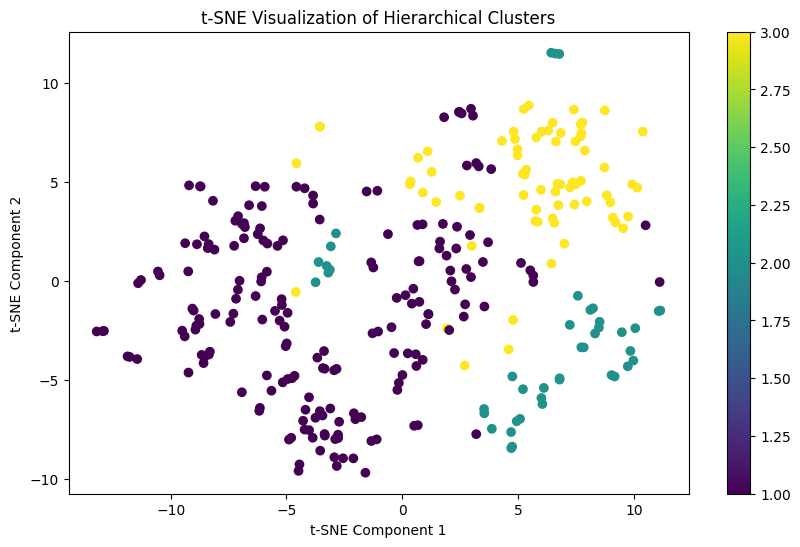

In [40]:
# PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('PCA Visualization of Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('t-SNE Visualization of Hierarchical Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


#### Using PCA and t-SNE to visualize DBSCAN Clustering

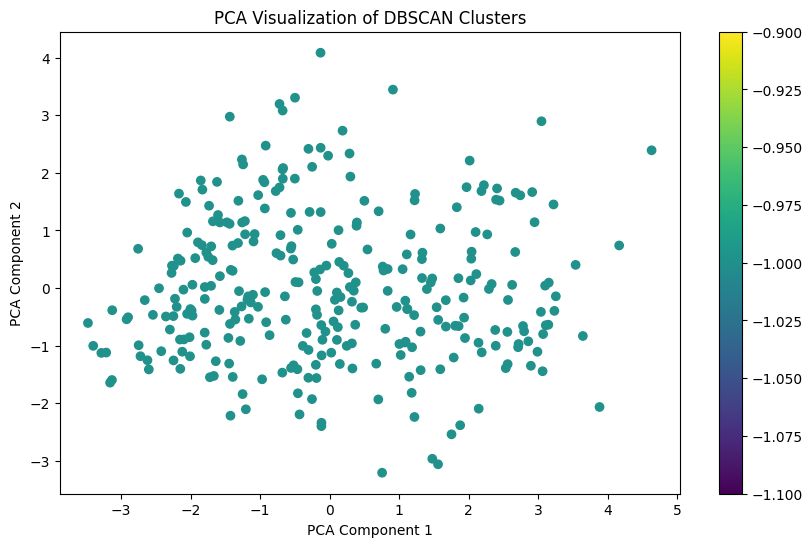

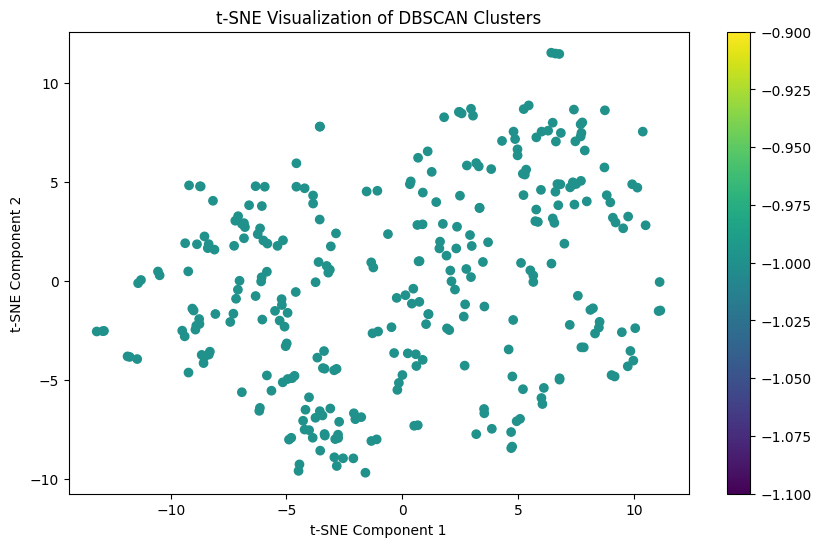

In [43]:
# PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('PCA Visualization of DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


#### Using PCA and t-SNE to visualize GMM Clustering

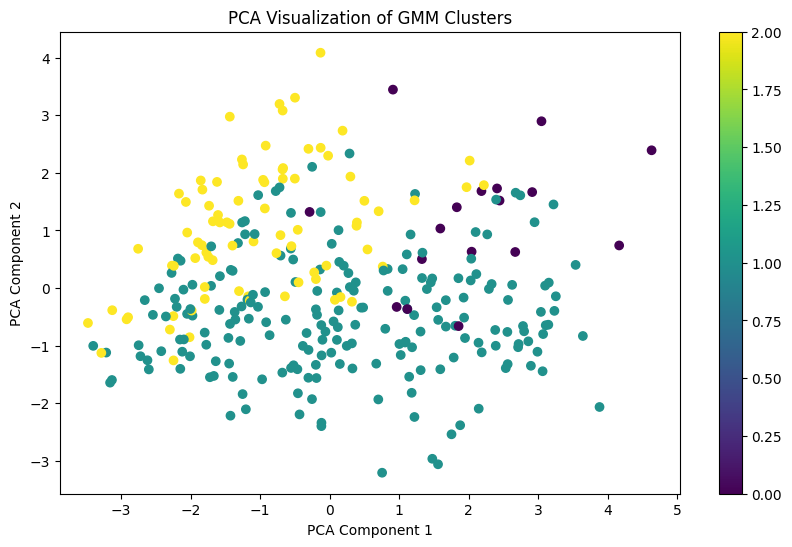

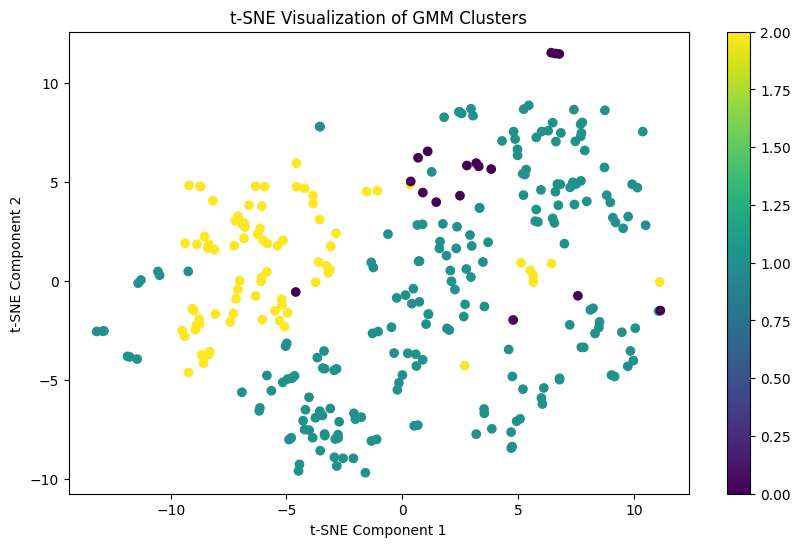

In [44]:
# PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=gmm_labels, cmap='viridis')
plt.title('PCA Visualization of GMM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=gmm_labels, cmap='viridis')
plt.title('t-SNE Visualization of GMM Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


## Evaluate Clustering Performance

#### K-Means Clustering

In [48]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
kmeans_db_index = davies_bouldin_score(scaled_df, kmeans_labels)

print(f'Silhouette Score: {kmeans_silhouette}')
print(f'Davies-Bouldin Index: {kmeans_db_index}')


Silhouette Score: 0.12920897032445627
Davies-Bouldin Index: 2.2298882379243397


#### Hierarchical Clustering

In [47]:
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
hierarchical_db_index = davies_bouldin_score(scaled_df, hierarchical_labels)

print(f'Silhouette Score: {hierarchical_silhouette}')
print(f'Davies-Bouldin Index: {hierarchical_db_index}')


Silhouette Score: 0.15546155376696907
Davies-Bouldin Index: 2.0786249922767266


#### DBSCAN Clustering

In [55]:
unique_dbscan_labels = len(set(dbscan_labels))
if unique_dbscan_labels > 1:
    dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(scaled_df, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f'Silhouette Score: {dbscan_silhouette}')
print(f'Davies-Bouldin Index: {dbscan_db_index}')


Silhouette Score: None
Davies-Bouldin Index: None


#### GMM Clustering

In [51]:
gmm_silhouette = silhouette_score(scaled_df, gmm_labels)
gmm_db_index = davies_bouldin_score(scaled_df, gmm_labels)

print(f'Silhouette Score: {gmm_silhouette}')
print(f'Davies-Bouldin Index: {gmm_db_index}')


Silhouette Score: 0.08623199149835163
Davies-Bouldin Index: 2.3625932442882895


## Comparing Clustering Performance

In [52]:
# Collect performance metrics
performance_metrics = {
    'Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [
        kmeans_silhouette,
        hierarchical_silhouette,
        dbscan_silhouette if dbscan_silhouette is not None else 'N/A',
        gmm_silhouette
    ],
    'Davies-Bouldin Index': [
        kmeans_db_index,
        hierarchical_db_index,
        dbscan_db_index if dbscan_db_index is not None else 'N/A',
        gmm_db_index
    ]
}

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)


      Algorithm Silhouette Score Davies-Bouldin Index
0       K-Means         0.129209             2.229888
1  Hierarchical         0.155462             2.078625
2        DBSCAN              N/A                  N/A
3           GMM         0.086232             2.362593


## Final Evaluation and Conclusion

#### 1. **K-Means Clustering**
- The performance of K-Means clustering suggests that the algorithm did not find well-defined clusters in the dataset. This might be due to the nature of the data, which may not be well-suited for K-Means clustering.

#### 2. **Hierarchical Clustering**

- Hierarchical clustering performed marginally better than K-Means. This method might be more suitable for the dataset, but it still does not provide strong clustering performance.

#### 3. **DBSCAN Clustering**
- DBSCAN clustering did not perform well on this dataset, as it failed to form multiple meaningful clusters. This might be due to the density-based nature of DBSCAN, which may require parameter tuning or might not be suitable for the given data.

#### 4. **Gaussian Mixture Models (GMM)**
- GMM clustering did not perform well on this dataset, suggesting that the data does not follow the Gaussian distribution assumptions well.




**From my observation, the best algorithm is Hierarchical Clustering**


- Hierarchical clustering, despite having modest performance metrics, outperformed the other clustering algorithms with a slightly better silhouette score and a lower Davies-Bouldin index.



- This means, using hierarchical clustering can provide a more meaningful grouping of patients based on their medical history. These clusters can then be analyzed to identify patterns or risk factors associated with heart disease, leading to better-targeted healthcare interventions.

## Conclusion

Overall, while hierarchical clustering is the best among the tested methods, the performance metrics indicate that the clustering is not very strong. Further investigation into feature engineering, parameter tuning, or using other advanced clustering techniques might be necessary to improve the clustering performance for this dataset.